<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/2020_BiharElections/alliance/Mahagathbandhan_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 314 (delta 27), reused 0 (delta 0), pack-reused 231
Receiving objects: 100% (314/314), 17.32 MiB | 14.94 MiB/s, done.
Resolving deltas: 100% (117/117), done.


In [128]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler

consumer_key= "DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret  = "jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"
access_token ="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret= "cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
# authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-10-15"
date2 = "2020-11-08"


text = []


def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2).items():
        print(tweet.text)
        text.append(tweet.text)
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"#Mahagathbandhan")  
           
data1 = list(zip(text))
df1 = pd.DataFrame(data =data1, columns =["Tweet"])

df1.to_csv('Mahagathbandhan_Dataset.csv') 


Hyderabad research agency predicts Mahagathbandhan win in Bihar 
#Mahagathbandhan #BiharElection2020 #ExitPolls… https://t.co/SeSpaIXoSq
<--------------------------------------------------->
1
RT @madhukishwar: I'm not unhappy if NDA loses election.
But worried at victory of #JungleRajParty.
#TejaswiYadav done nothing to distance…
<--------------------------------------------------->
2
Is #TejashwiYadav #winning #BiharElection2020  ... Kya #Tejaswi #LaluPrasadYadav #Mahagathbandhan #jeetega ya… https://t.co/Ik8aOVPXEO
<--------------------------------------------------->
3
RT @INCTharoorian: Are you #Mahagathbandhan govt ready? https://t.co/yPWBmnBm1B
<--------------------------------------------------->
4
RT @madhukishwar: I'm not unhappy if NDA loses election.
But worried at victory of #JungleRajParty.
#TejaswiYadav done nothing to distance…
<--------------------------------------------------->
5
RT @IndiaToday: #Mahagathbandhan is projected to get 44 percent vote share as compared t

# **Importing Libraries**

In [129]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# **Cleaning** **Mahagathbandhan_Dataset**

```
# length of the dataset
```



In [131]:
tweets_list = df1['Tweet'].tolist()
len(tweets_list)

872

# Removing duplicate tweets if any

In [132]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)

432

```
No of duplicate tweets
```

In [133]:
df1['Tweet'].duplicated().sum()

440

In [134]:
df1 = df1.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df1.shape

(432, 1)

`Removed all the dupliactes`



# **Removing Emojis**


In [135]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df1['Processed_Tweet']=df1.Tweet.apply(remove_emoji)

From now on, all the preprocessing & modelling on tweets will be stored in the data column called 'Processed_Tweet'[link text](https://)

In [136]:
count = 0
for i in df1['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df1.drop(df1.loc[df1['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

81

In [137]:
df1.shape

(351, 2)

In [138]:
df1['Processed_Tweet']

0      Hyderabad research agency predicts Mahagathban...
2      Is #TejashwiYadav #winning #BiharElection2020 ...
6      What is your biggest sex fantasy? #Mahagathban...
7      All the exit polls for 2020 #Bihar Assembly el...
13     #ExitPolls\n#Mahagathbandhan\nBhiar is going t...
                             ...                        
427    Vote for real street Shakthi, not the Fake, ho...
428    Seventy-eight assembly  spread across 19 distr...
429    Vote for Mahaghatbandhan Sarkar \n \nVote for:...
430    Build Back Better Bihar. Vote for Congress and...
431    Bihar has rejected Modi On 10 November  Bihar ...
Name: Processed_Tweet, Length: 351, dtype: object

# **Removing Username**

In [139]:
df1['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df1['Processed_Tweet']] #remove usernames
df1['Processed_Tweet']

0      Hyderabad research agency predicts Mahagathban...
2      Is #TejashwiYadav #winning #BiharElection2020 ...
6      What is your biggest sex fantasy? #Mahagathban...
7      All the exit polls for 2020 #Bihar Assembly el...
13     #ExitPolls\n#Mahagathbandhan\nBhiar is going t...
                             ...                        
427    Vote for real street Shakthi, not the Fake, ho...
428    Seventy-eight assembly  spread across 19 distr...
429    Vote for Mahaghatbandhan Sarkar \n \nVote for:...
430    Build Back Better Bihar. Vote for Congress and...
431    Bihar has rejected Modi On 10 November  Bihar ...
Name: Processed_Tweet, Length: 351, dtype: object

# **Removing URL if any**

In [140]:
df1['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df1['Processed_Tweet']] #Remove urls
df1['Processed_Tweet']

0      Hyderabad research agency predicts Mahagathban...
2      Is #TejashwiYadav #winning #BiharElection2020 ...
6      What is your biggest sex fantasy? #Mahagathban...
7      All the exit polls for 2020 #Bihar Assembly el...
13     #ExitPolls\n#Mahagathbandhan\nBhiar is going t...
                             ...                        
427    Vote for real street Shakthi, not the Fake, ho...
428    Seventy-eight assembly  spread across 19 distr...
429    Vote for Mahaghatbandhan Sarkar \n \nVote for:...
430    Build Back Better Bihar. Vote for Congress and...
431    Bihar has rejected Modi On 10 November  Bihar ...
Name: Processed_Tweet, Length: 351, dtype: object

# **Removing Hashtags but keeping the word**

In [141]:
df1['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df1['Processed_Tweet']] # remove the # in #hashtag
df1['Processed_Tweet']

0      Hyderabad research agency predicts Mahagathban...
2      Is TejashwiYadav winning BiharElection2020  .....
6      What is your biggest sex fantasy? Mahagathband...
7      All the exit polls for 2020 Bihar Assembly ele...
13     ExitPolls\nMahagathbandhan\nBhiar is going to ...
                             ...                        
427    Vote for real street Shakthi, not the Fake, ho...
428    Seventy-eight assembly  spread across 19 distr...
429    Vote for Mahaghatbandhan Sarkar \n \nVote for:...
430    Build Back Better Bihar. Vote for Congress and...
431    Bihar has rejected Modi On 10 November  Bihar ...
Name: Processed_Tweet, Length: 351, dtype: object

# ***Using Preprocessor Library***

In [142]:
!pip install preprocessor

In [143]:
!pip install tweet-preprocessor

In [145]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df1['Processed_Tweet'] = [p.clean(i) for i in df1['Processed_Tweet']]
df1['Processed_Tweet']

0      Hyderabad research agency predicts Mahagathban...
2      Is TejashwiYadav winning BiharElection2020 ......
6      What is your biggest sex fantasy? Mahagathbandhan
7      All the exit polls for Bihar Assembly election...
13     ExitPollsMahagathbandhanBhiar is going to anno...
                             ...                        
427    Vote for real street Shakthi, not the Fake, ho...
428    Seventy-eight assembly spread across districts...
429    Vote for Mahaghatbandhan Sarkar Vote for: -Job...
430    Build Back Better Bihar. Vote for Congress and...
431    Bihar has rejected Modi On November Bihar will...
Name: Processed_Tweet, Length: 351, dtype: object

# **Removing any special characters, numbers, punctuations,etc..**

In [146]:
df1.Processed_Tweet = df1.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df1["Processed_Tweet"]

0      Hyderabad research agency predicts Mahagathban...
2      Is TejashwiYadav winning BiharElection        ...
6      What is your biggest sex fantasy  Mahagathbandhan
7      All the exit polls for Bihar Assembly election...
13     ExitPollsMahagathbandhanBhiar is going to anno...
                             ...                        
427    Vote for real street Shakthi  not the Fake  ho...
428    Seventy eight assembly spread across districts...
429    Vote for Mahaghatbandhan Sarkar Vote for   Job...
430    Build Back Better Bihar  Vote for Congress and...
431    Bihar has rejected Modi On November Bihar will...
Name: Processed_Tweet, Length: 351, dtype: object

# **Converting to lowercase**

In [147]:
df1.Processed_Tweet = [low.lower() for low in df1.Processed_Tweet] #Converting into lower case
df1["Processed_Tweet"]

0      hyderabad research agency predicts mahagathban...
2      is tejashwiyadav winning biharelection        ...
6      what is your biggest sex fantasy  mahagathbandhan
7      all the exit polls for bihar assembly election...
13     exitpollsmahagathbandhanbhiar is going to anno...
                             ...                        
427    vote for real street shakthi  not the fake  ho...
428    seventy eight assembly spread across districts...
429    vote for mahaghatbandhan sarkar vote for   job...
430    build back better bihar  vote for congress and...
431    bihar has rejected modi on november bihar will...
Name: Processed_Tweet, Length: 351, dtype: object

In [148]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

**`We still have to remove stopwords, perform lemmatization & do stemming. So let us proceed with that`**

# **Removing Stop Words**

In [149]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['or', "don't", 'ours', "weren't", 'between', 'just', 'at', 'until', 'not', 'hasn', 'does', 'a', 'm', 'before', 'myself', "you've", 'these', 'who', "she's", 'itself', 'it', "shouldn't", "you're", 'if', 'them', 'she', "won't", 'how', 'what', 'aren', 'from', 'ma', 'needn', 'shan', 'against', 'its', 'himself', 'wouldn', 'do', 'y', 'won', "you'd", 'again', 'yourselves', 'hadn', 'me', 'our', 'for', 'with', 'yourself', 'into', 'above', 'further', 'my', 'then', 'whom', 'up', 'he', 'was', 'doesn', 'this', "wouldn't", "haven't", "hasn't", 'very', 'i', 'weren', "shan't", 'had', 'there', 'couldn', 'during', 'haven', 'your', 'such', 'you', 'now', 'be', 'as', "mightn't", 'were', 'too', 'same', 'has', 'when', 'their', 'the', 'off', 'didn', 'him', 'other', 'own', 'hers', 'after', 't', 'ain', "it's", 'll', 'down', "isn't", 'so', 'why', 'an', 'that', 'nor', 'we', 'by', 'will', 'o', 'both', 'can', 'doing', 'being', 'am', "wasn't", 'having', 'below', 'on', 'some', 'than', 'mustn', 'to', 'over', 'yours', 

In [151]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df1['Processed_Tweet']

0      hyderabad research agency predicts mahagathban...
2      tejashwiyadav winning biharelection kya tejasw...
6                    biggest sex fantasy mahagathbandhan
7      exit polls bihar assembly elections shows maha...
13     exitpollsmahagathbandhanbhiar going announce n...
                             ...                        
427    vote real street shakthi fake hollow beti bach...
428    seventy eight assembly spread across districts...
429    vote mahaghatbandhan sarkar vote job creation ...
430    build back better bihar vote congress mahagath...
431    bihar rejected modi november bihar see rjd con...
Name: Processed_Tweet, Length: 351, dtype: object

# **Tokenizing**

In [152]:
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df1['Processed_Tweet']

0      [hyderabad, research, agency, predicts, mahaga...
2      [tejashwiyadav, winning, biharelection, kya, t...
6               [biggest, sex, fantasy, mahagathbandhan]
7      [exit, polls, bihar, assembly, elections, show...
13     [exitpollsmahagathbandhanbhiar, going, announc...
                             ...                        
427    [vote, real, street, shakthi, fake, hollow, be...
428    [seventy, eight, assembly, spread, across, dis...
429    [vote, mahaghatbandhan, sarkar, vote, job, cre...
430    [build, back, better, bihar, vote, congress, m...
431    [bihar, rejected, modi, november, bihar, see, ...
Name: Processed_Tweet, Length: 351, dtype: object

# **Stemming**

In [153]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df1['Processed_Tweet'] = df1['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df1['Processed_Tweet']

0      [hyderabad, research, agenc, predict, mahagath...
2      [tejashwiyadav, win, biharelect, kya, tejaswi,...
6               [biggest, sex, fantasi, mahagathbandhan]
7      [exit, poll, bihar, assembl, elect, show, maha...
13     [exitpollsmahagathbandhanbhiar, go, announc, n...
                             ...                        
427    [vote, real, street, shakthi, fake, hollow, be...
428    [seventi, eight, assembl, spread, across, dist...
429    [vote, mahaghatbandhan, sarkar, vote, job, cre...
430    [build, back, better, bihar, vote, congress, m...
431    [bihar, reject, modi, novemb, bihar, see, rjd,...
Name: Processed_Tweet, Length: 351, dtype: object

In [154]:
df1['Processed_Tweet'] = df1.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df1

,Tweet,Processed_Tweet
0,Hyderabad research agency predicts Mahagathban...,"[hyderabad, research, agenc, predict, mahagath..."
2,Is #TejashwiYadav #winning #BiharElection2020 ...,"[tejashwiyadav, win, biharelect, kya, tejaswi,..."
6,What is your biggest sex fantasy? #Mahagathban...,"[biggest, sex, fantasi, mahagathbandhan]"
7,All the exit polls for 2020 #Bihar Assembly el...,"[exit, poll, bihar, assembl, elect, show, maha..."
13,#ExitPolls\n#Mahagathbandhan\nBhiar is going t...,"[exitpollsmahagathbandhanbhiar, announc, new, ..."
...,...,...
427,"Vote for real street Shakthi, not the Fake, ho...","[vote, real, street, shakthi, fake, hollow, be..."
428,Seventy-eight assembly spread across 19 distr...,"[seventi, eight, assembl, spread, across, dist..."
429,Vote for Mahaghatbandhan Sarkar \n \nVote for:...,"[vote, mahaghatbandhan, sarkar, vote, job, cre..."
430,Build Back Better Bihar. Vote for Congress and...,"[build, back, better, bihar, vote, congress, m..."


In [155]:
texts = []
texts = df1.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

3103

In [156]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))

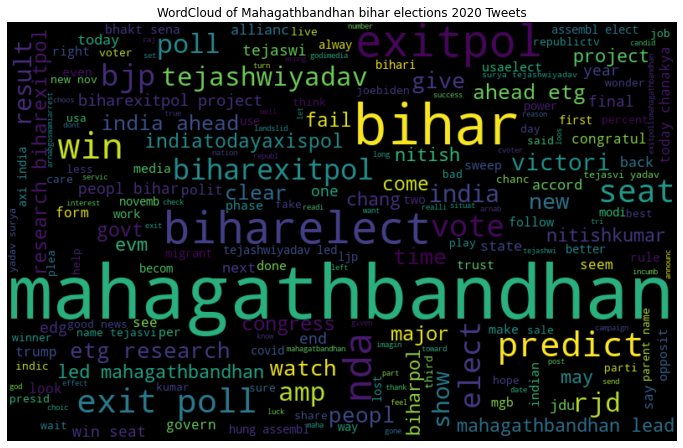

In [158]:
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Mahagathbandhan bihar elections 2020 Tweets")
plt.show()

# **Sentiment Analysis**




In [159]:
from textblob import TextBlob

In [160]:
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

351

In [161]:
df1['Processed_Tweet']

0      [hyderabad, research, agenc, predict, mahagath...
2      [tejashwiyadav, win, biharelect, kya, tejaswi,...
6               [biggest, sex, fantasi, mahagathbandhan]
7      [exit, poll, bihar, assembl, elect, show, maha...
13     [exitpollsmahagathbandhanbhiar, announc, new, ...
                             ...                        
427    [vote, real, street, shakthi, fake, hollow, be...
428    [seventi, eight, assembl, spread, across, dist...
429    [vote, mahaghatbandhan, sarkar, vote, job, cre...
430    [build, back, better, bihar, vote, congress, m...
431    [bihar, reject, modi, novemb, bihar, see, rjd,...
Name: Processed_Tweet, Length: 351, dtype: object



```
**# Classifying tweets as neutral, positive, negative**
```




In [162]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 149
Negative Tweets: 42
Neutral Tweets 160


In [163]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [164]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.703,0.297,0.5859
1,0.000,0.648,0.352,0.5859
2,0.000,1.000,0.000,0.0000
3,0.000,0.725,0.275,0.5859
4,0.000,0.723,0.277,0.3182
...,...,...,...,...
346,0.279,0.721,0.000,-0.4767
347,0.000,1.000,0.000,0.0000
348,0.000,0.654,0.346,0.6486
349,0.000,0.674,0.326,0.4404


In [165]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.0,0.703,0.297,0.5859,Positive
1,0.0,0.648,0.352,0.5859,Positive
2,0.0,1.000,0.000,0.0000,Neutral
3,0.0,0.725,0.275,0.5859,Positive
4,0.0,0.723,0.277,0.3182,Positive


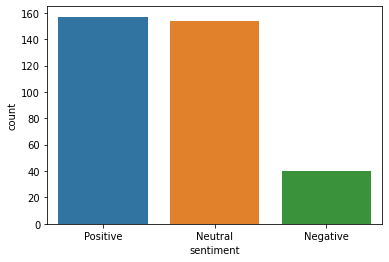

In [166]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)